In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
diabetes = pd.read_csv("lr_diabetes.csv")

In [26]:
diabetes.head()

,bmi,Progression
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


In [27]:
diabetes.shape

(442, 2)

In [31]:
X = diabetes.values[:,0].reshape(-1,1)
y = diabetes.values[:,1]

In [13]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=4) 

In [14]:
# Create linear regression object
from sklearn import linear_model

regr = linear_model.LinearRegression()

In [17]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [46]:
# The coefficients
print('Coefficients: \n', regr.coef_)
#Intercept
print('Intercept: \n', regr.intercept_)


Coefficients: 
 [895.08229306]
Intercept: 
 152.46403514027705


In [47]:
# The mean squared error : How the observed values vary from the predicted values :  Avg(Square(y_test[i]-y_pred[i]))
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 3114.13


In [48]:
# Explained variance score: value is between 0 and 1 and 1 is for perfect prediction : 
# the proportion of the variance in the dependent variable(target) 
# that is predictable from the independent variable(s) (features)

print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.42


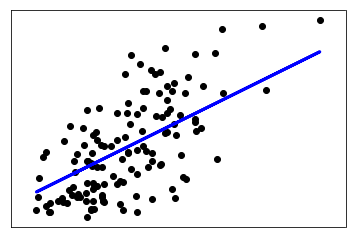

In [49]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [50]:
'''
Understanding mean squared error
'''
round(np.mean((y_test-y_pred)**2),2)

3114.13

In [ ]:
'''
Varience sore of r2_score = 1-(g/y)

g : Sum of Squared distance or difference between the observed values and the predicted ones. 
    g = Sum((y_test[i] – y_pred[i]) **2)
y : Sum of the Squared distance between observed value y_test and the average of observed values mean(y_test) : 
    y = Sum((y_test[i] – mean[y_test]) **2)

g. is called as sum of squared error
y is called as sum of residuals

'''
g = np.sum((y_test-y_pred)**2)
y = np.sum((y_test-np.mean(y_test))**2)
print('Sum of Squared error',g)
print('Sum of residuals',y)
print('varience score is', round(1-(g/y),2) )